In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
credit = pd.read_csv('creditcard.csv')

In [5]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit.isnull().sum() #결측치가 없음을 확인

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
print("Total number of labels: {}".format(credit.shape[0])) #총 라벨 수 확인

Total number of labels: 284806


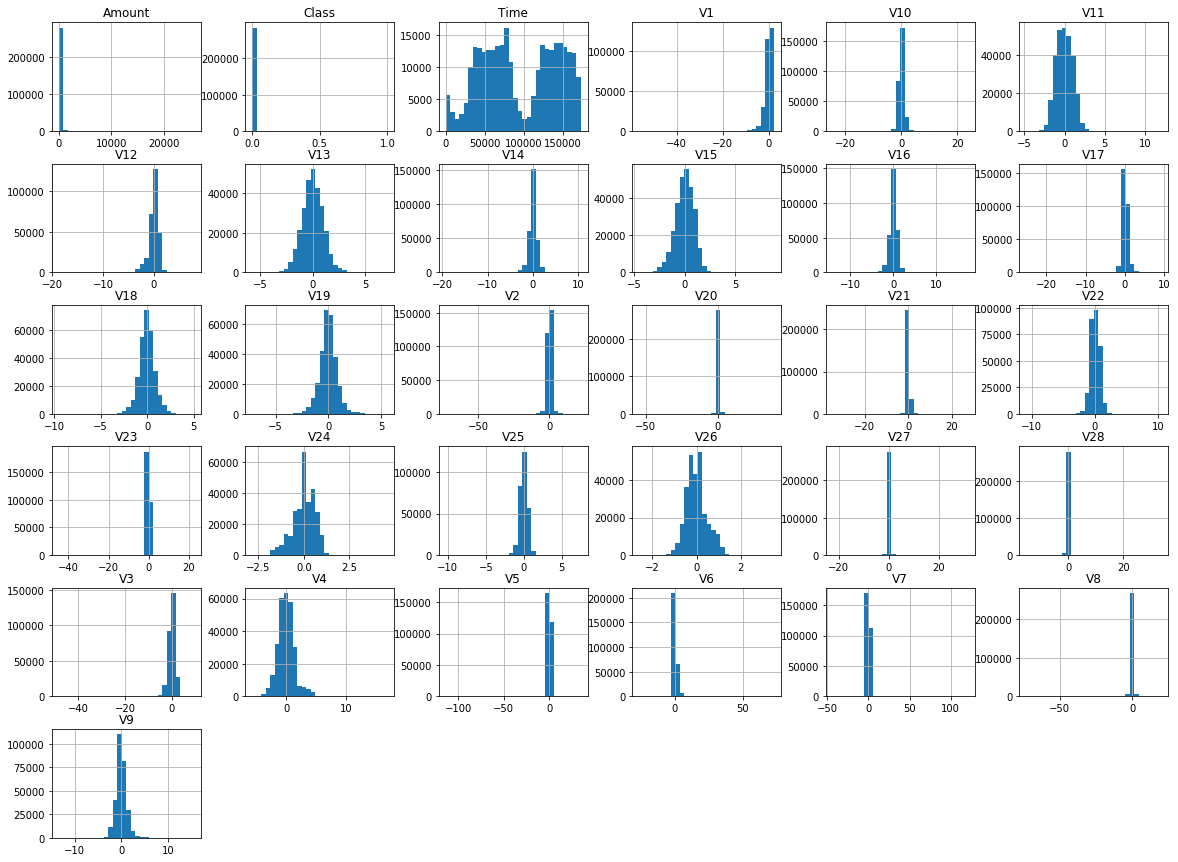

In [8]:
# 모든 연속형 변수에 대한 히스토그램 한꺼번에 그리기

credit.hist(bins=30,figsize=(20,15)) #figsize를 통해 plot 크기 조절
plt.show()

In [9]:
del credit['Amount']
del credit['V20']
del credit['V21']
del credit['V27']
del credit['V28']

In [10]:
X = credit.iloc[:,:-1] # X데이터 분리
y = credit.iloc[:,-1] # y데이터 분리

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
#데이터 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [13]:
from sklearn import metrics #model evaluation하는 라이브러리

svc=SVC(kernel='linear') # 리니어 모델로해보자
svc.fit(X_train,y_train) # 모델 훈련 중...

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
y_pred=svc.predict(X_test) # 훈련한 모델로 test셋을 시험해보자
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어 확인

Accuracy Score:
0.999385555282469


In [ ]:
svc_2=SVC(kernel='rbf', gamma=1) # rbf 커널 모델로해보자
svc_2.fit(X_train,y_train) # 모델 훈련 중...

In [ ]:
y_pred=svc_2.predict(X_test)
print('rbf Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

In [ ]:
#rbf 부분이 너무 돌아가지 않아서
#imbalance한 데이터 처리하는 방법에 대한 피드백을 주시면 추후 수정해보고 싶습니다 감사합니다!